In [12]:
# example of loading a pix2pix model and using it for image to image translation
import tensorflow
from tensorflow.keras.models import load_model
from numpy import load
from numpy import vstack
import matplotlib.pyplot as plt
from numpy.random import randint

In [2]:
def load_real_samples(filename):
    #load the compresses arrays
    data = load(filename)
    #unpack the arrays
    X1,X2 = data['arr_0'],data['arr_1']
    
    #scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5)/127.5
    X2 = (X2 - 127.5)/127.5
    
    return [X1,X2]

In [3]:
def plot_images(src_img,gen_img,tar_img):
    images = vstack((src_img,gen_img,tar_img))
    #[-1,1] to [0,1]
    images = (images+1)/2.0
    titles = ['Source','Generated','Expected']
    #plot images row by row
    for i in range(len(images)):
        #define subplot
        plt.subplot(1,3,i+1)
        plt.axis('off')
        plt.imshow(images[i])
        plt.title(titles[i])
    plt.show()

In [6]:
# load dataset
[X1,X2] = load_real_samples('maps_256.npz')
print('Loaded',X1.shape,X2.shape)

Loaded (1096, 256, 256, 3) (1096, 256, 256, 3)


In [7]:
# load model
model = load_model('pix2pix.h5')

In [26]:
# select random example
ix = randint(0,len(X1),1)
src_img,tar_img = X1[ix],X2[ix]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


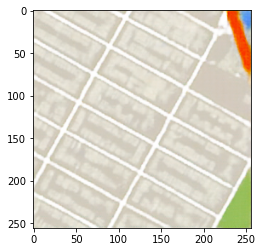

In [30]:
#generate image from source
gen_img = model.predict(src_img)
plt.imshow(gen_img[0])

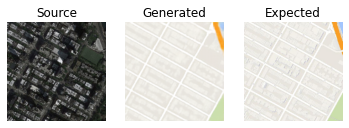

In [28]:
plot_images(src_img,gen_img,tar_img)